# WeatherPy

## Analysis
* Observed Trend 1
* Observed Trend 2
* Observed Trend 3

In [1]:
import openweathermapy as owm
import pandas as pd
import matplotlib.pyplot as plt
import requests
import random
from config import api_key
import seaborn as sns
#Import list of cities
citydf = pd.read_csv('worldcitiespop.txt',encoding='utf-8',low_memory=False,dtype=str)
print(citydf.info())
#Remove unused columns and deduplicate on lat & lng
# Deduplicating removes ~30% of cities but retains
# some duplicates with near lat-long, although sampling from
# 2.2E6 should make the effect on trend data minimal
citydf = citydf.drop(columns=['AccentCity','Region','Population'])
citydf = citydf.drop_duplicates(subset=['Latitude','Longitude'],keep='first')
citydf = citydf.reset_index()
print(citydf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173958 entries, 0 to 3173957
Data columns (total 7 columns):
Country       object
City          object
AccentCity    object
Region        object
Population    object
Latitude      object
Longitude     object
dtypes: object(7)
memory usage: 169.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243854 entries, 0 to 2243853
Data columns (total 5 columns):
index        int64
Country      object
City         object
Latitude     object
Longitude    object
dtypes: int64(1), object(4)
memory usage: 85.6+ MB
None


## Define parameters for querying

In [2]:
settings = {'units':'imperial','APPID':api_key}

In [3]:
#Build cities data frame by using pandas sample method
# initial testing will use 50 for expedited 
cities = citydf.sample(50)
#Add columns for max temp to working dataframe
cities['Max Temp'] = ''
cities['Cloudiness'] = ''
cities['Wind Speed'] = ''
cities['Humidity'] = ''

In [4]:
#Iterate over each row of the dataframe, pulling API data into lists
# both pandas documentation and stackoverflow caution against trying
# to append/modify a dataframe being iterated over
list_of_max_temps = []
list_of_cloud = []
list_of_wind = []
list_of_humidity = []
for row, index in cities.iterrows():
    lat = index['Latitude']
    lng = index['Longitude']
    location = (lat, lng)
    try:
        data = owm.get_current(location,**settings)
        list_of_max_temps.append(data("main.temp_max"))
        list_of_cloud.append(data("clouds.all"))
        list_of_wind.append(data("wind.speed"))
        list_of_humidity.append(data("main.humidity"))
    except:
        raise print("Whoops! Something went wrong, check your lat/long coordinates!")
print('Retrieval of OWM data is finished.')

Retrieval of OWM data is finished.


In [5]:
#Add the lists of data into the data frame
cities['Max Temp'] = list_of_max_temps
cities['Cloudiness'] = list_of_cloud
cities['Wind Speed'] = list_of_wind
cities['Humidity'] = list_of_humidity

In [6]:
cities.head()

,index,Country,City,Latitude,Longitude,Max Temp,Cloudiness,Wind Speed,Humidity
530682,782840,de,sudheim,51.666667,9.983333,69.80,0,9.17,46
1662161,2389597,ru,dedilovskiye vyselki,54.331021,38.040244,63.09,8,3.53,65
814768,1187871,id,jarkali,-6.911,112.068,73.26,32,2.75,94
1196721,1778044,mg,ampienenana,-21.7,47.2666667,62.55,80,3.76,99
1015555,1467287,ir,qalatak,29.972567,51.784513,63.72,0,3.42,48


In [7]:
#Transform Lat values in DF into absolute values now that parsing is done
# note the values were imported as strings to make querying easily
cities['Latitude'] = pd.to_numeric(cities['Latitude'],errors='raise')
cities['Latitude(Abs)'] = abs(cities['Latitude'])
cities.head()

,index,Country,City,Latitude,Longitude,Max Temp,Cloudiness,Wind Speed,Humidity,Latitude(Abs)
530682,782840,de,sudheim,51.666667,9.983333,69.80,0,9.17,46,51.666667
1662161,2389597,ru,dedilovskiye vyselki,54.331021,38.040244,63.09,8,3.53,65,54.331021
814768,1187871,id,jarkali,-6.911000,112.068,73.26,32,2.75,94,6.911000
1196721,1778044,mg,ampienenana,-21.700000,47.2666667,62.55,80,3.76,99,21.700000
1015555,1467287,ir,qalatak,29.972567,51.784513,63.72,0,3.42,48,29.972567


[Text(0,0.5,'Max Temp (F)'),
 Text(0.5,0,'Degrees Latitude'),
 Text(0.5,1,'Max Temp(F) of random cities vs. Latitude')]

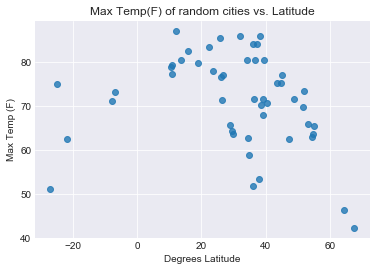

In [8]:
sns.set_style('darkgrid')
temp_ax = sns.regplot(x=cities['Latitude'],y=cities['Max Temp'],fit_reg=False)
temp_ax.set(xlabel='Degrees Latitude',ylabel='Max Temp (F)',title='Max Temp(F) of random cities vs. Latitude')

[Text(0,0.5,'Max Temp (F)'),
 Text(0.5,0,'Degrees Lat. from Equator'),
 Text(0.5,1,'Max Temp(F) of random cities vs. Lat. from Equator')]

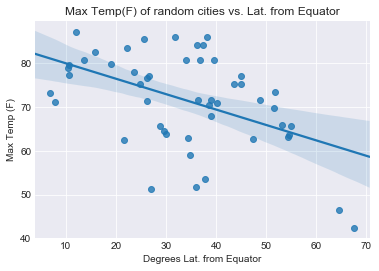

In [9]:
abs_temp_ax = sns.regplot(x=cities['Latitude(Abs)'],y=cities['Max Temp'])
abs_temp_ax.set(xlabel='Degrees Lat. from Equator',ylabel='Max Temp (F)',title='Max Temp(F) of random cities vs. Lat. from Equator')

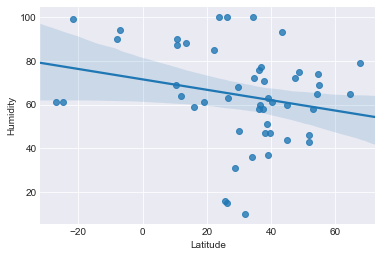

In [10]:
sns.regplot(x=cities['Latitude'],y=cities['Humidity'])

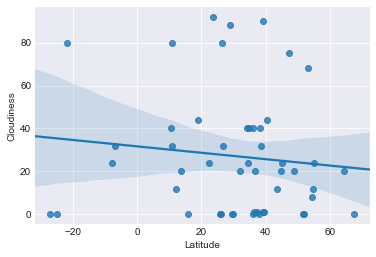

In [11]:
sns.regplot(x=cities['Latitude'],y=cities['Cloudiness'])

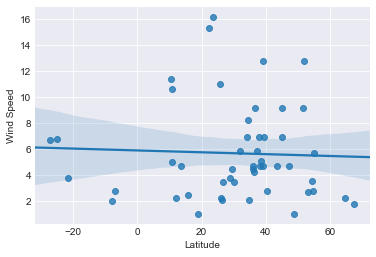

In [12]:
sns.regplot(x=cities['Latitude'],y=cities['Wind Speed'])